<a href="https://colab.research.google.com/github/pavanm555/Artificial-Intelligence/blob/main/Drug_Classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Read the dataset and do data pre-processing

In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.shape

(200, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
# Checking null values
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.describe(include = "all")

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [ ]:
df.Sex.unique()

array(['F', 'M'], dtype=object)

In [ ]:
df.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [ ]:
df.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [ ]:
df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
df.corr()

<ipython-input-243-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


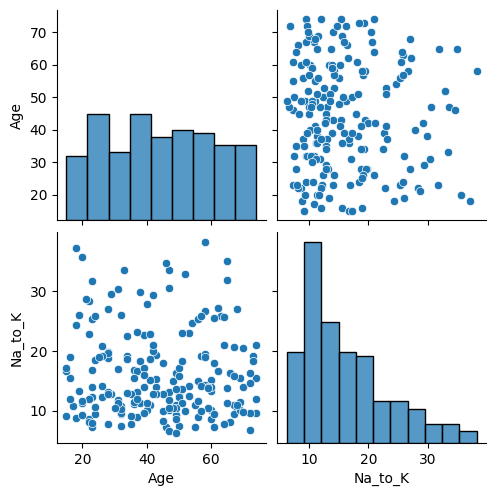

In [ ]:
# Visualization
sns.pairplot(df)

<ipython-input-245-2d3646dd07cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

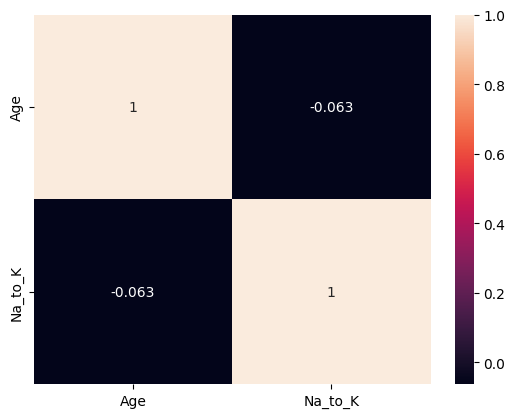

In [ ]:
sns.heatmap(df.corr(),annot = True)

<Axes: >

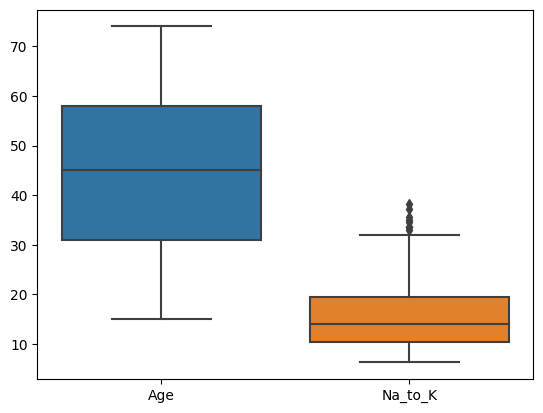

In [ ]:
# Outlier Detection
sns.boxplot(df)

<Axes: >

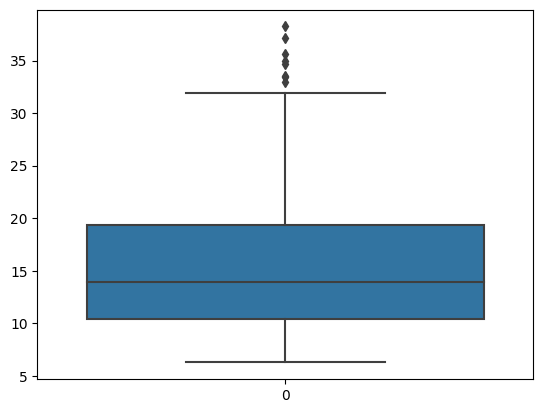

In [ ]:
sns.boxplot(df.Na_to_K)

In [ ]:
## Outlier removal using IQR
q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)
q1, q3

(10.4455, 19.38)

In [ ]:
IQR = q3 - q1
IQR

8.9345

In [ ]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR
upper_limit

32.78175

In [ ]:
df = df[df.Na_to_K<upper_limit]

<Axes: >

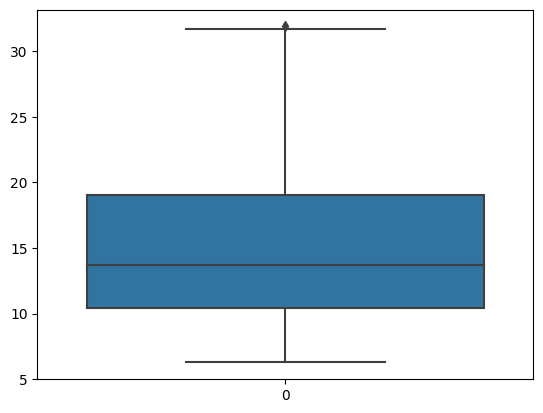

In [ ]:
sns.boxplot(df.Na_to_K)

In [ ]:
df.shape

(192, 6)

In [ ]:
# Splitting the features and target
x = df.iloc[:,0:5]
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [ ]:
y = df.iloc[:,5:]
y

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


In [ ]:
# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((153, 5), (39, 5), (153, 1), (39, 1))

In [ ]:
CategoricalFeatures = xtrain.select_dtypes(exclude = 'number')
CategoricalFeatures = CategoricalFeatures.columns
CategoricalFeatures

Index(['Sex', 'BP', 'Cholesterol'], dtype='object')

In [ ]:
# Encode the Categorical variable
le = LabelEncoder()
for feature in CategoricalFeatures:
  xtrain[feature] = le.fit_transform(xtrain[feature])
  xtest[feature] = le.transform(xtest[feature])
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
xtrain.head(), xtest.head()

(     Age  Sex  BP  Cholesterol  Na_to_K
 83    38    0   0            1   11.326
 112   35    1   1            1    9.170
 167   57    0   2            0   14.216
 36    32    1   0            1    9.445
 140   49    1   0            1    6.269,
      Age  Sex  BP  Cholesterol  Na_to_K
 46    37    0   0            0   13.091
 141   64    0   1            1   25.741
 77    26    0   0            1   19.161
 148   61    0   1            1    7.340
 116   67    1   2            1    9.514)

In [ ]:
ytrain

array([1, 4, 4, 1, 1, 4, 0, 0, 2, 1, 0, 4, 2, 0, 0, 0, 4, 4, 4, 0, 0, 0,
       4, 1, 1, 4, 0, 4, 0, 3, 3, 4, 0, 0, 4, 2, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 2, 3, 4, 0, 1, 0, 0, 2, 0, 3, 0, 4, 0, 0, 2,
       4, 0, 0, 0, 3, 4, 3, 4, 2, 2, 0, 4, 0, 1, 3, 0, 0, 4, 4, 4, 0, 0,
       4, 4, 1, 4, 2, 2, 0, 3, 0, 0, 4, 4, 3, 4, 0, 3, 1, 0, 0, 0, 0, 0,
       1, 2, 1, 0, 0, 4, 0, 4, 2, 3, 1, 4, 3, 0, 0, 0, 0, 4, 0, 0, 0, 4,
       4, 1, 3, 0, 0, 4, 1, 4, 3, 0, 0, 0, 2, 4, 0, 4, 0, 4, 0, 0, 4])

In [ ]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

Task2: Build the ANN model with (input layer, min 3 hidden layers & output layer)

In [ ]:
# Building the ANN Model
model = Sequential()
model.add(Dense(5,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(xtrain,ytrain,epochs=60,batch_size=5,validation_data=(xtest,ytest))

Epoch 1/60
31/31 [==============================] - 1s 10ms/step - loss: 3.2466 - accuracy: 0.4510 - val_loss: 1.6784 - val_accuracy: 0.3333
Epoch 2/60
31/31 [==============================] - 0s 4ms/step - loss: 1.2176 - accuracy: 0.5556 - val_loss: 1.2649 - val_accuracy: 0.4359
Epoch 3/60
31/31 [==============================] - 0s 3ms/step - loss: 1.0950 - accuracy: 0.5490 - val_loss: 1.1831 - val_accuracy: 0.4615
Epoch 4/60
31/31 [==============================] - 0s 4ms/step - loss: 1.0548 - accuracy: 0.6275 - val_loss: 1.2170 - val_accuracy: 0.4615
Epoch 5/60
31/31 [==============================] - 0s 4ms/step - loss: 1.1111 - accuracy: 0.5490 - val_loss: 1.2426 - val_accuracy: 0.4103
Epoch 6/60
31/31 [==============================] - 0s 3ms/step - loss: 1.0158 - accuracy: 0.6078 - val_loss: 1.1036 - val_accuracy: 0.4359
Epoch 7/60
31/31 [==============================] - 0s 4ms/step - loss: 1.0009 - accuracy: 0.6275 - val_loss: 1.1343 - val_accuracy: 0.5385
Epoch 8/60
31/31 [=

Task 3: Test the model with random data

In [ ]:
# Testing
ypred = model.predict([[50,0,2,0,13]])
ypred

1/1 [==============================] - 0s 94ms/step


array([[2.7742812e-01, 5.9403199e-05, 2.8841650e-05, 6.1374228e-02,
        6.6110939e-01]], dtype=float32)

In [ ]:
ypred = np.argmax(ypred)
Possible_Outputs = df['Drug'].unique()
print(Possible_Outputs)

['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [ ]:
output = Possible_Outputs[ypred]
output

'drugB'

In [ ]:
# Accuracy
test_loss, test_acc = model.evaluate(xtest, ytest)
print('Accuracy: ', test_acc * 100)

2/2 [==============================] - 0s 8ms/step - loss: 0.4129 - accuracy: 0.8205
Accuracy:  82.05128312110901
